<h1><center><div style="direction:ltr;font-family:B Lotus, B Nazanin, Tahoma">Introduce the Hoda data set and resize it for use in machine algorithms</div></center></h1>

## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Introduction of Hoda Manuscript Figures Database</div>

<div style="direction:rtl;text-align:left;font-family:Tahoma">
Hoda Manuscripts Collection, which is the first large collection of Persian manuscripts, contains 102,353 samples of black and white manuscripts. This collection was prepared during a master project on recognizing handwritten forms. This collection has been extracted from about 12,000 registration forms for the national master's exam in 2005 and the online associate exam of the Comprehensive University of Applied Sciences in 2004 [1].
</div>
<p>
<a href="https://www.sciencedirect.com/science/article/pii/S0167865507000037" target="_blank">
H. Khosravi and E. Kabir, "Introducing a very large dataset of handwritten Farsi digits and a study on their varieties," Pattern Recognition Letters, vol. 28, pp. 1133-1141, 2007. ]
</a>    
</p>

## <div style="direction:rtl;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Load used libraries</div>
<div style="direction:rtl;text-align:left;font-family:Tahoma">
You need to install numpy, scipy, matplotlib and scikit-image libraries to run this notebook. To do this, connect to the Internet and type the following commands in cmd:
</div>
<p>pip install numpy</p>
<p>pip install scipy</p>
<p>pip install matplotlib</p>
<p>pip install scikit-image</p>

<div style="direction:rtl;text-align:left;font-family:Tahoma">
You can use the word conda instead of pip. (If you use anaconda).
</div>

In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

## <div style="direction:rtl;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Load dataset</div>
<div style="direction:rtl;text-align:left;font-family:Tahoma">
This data set is published in the form of a MATLAB mat file. In Python we can load it with the scipy library.</div>


In [2]:
#load dataset
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

## <div style="direction:rtl;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Select training data set and test data set (test)</div>
<div style="direction:rtl;text-align:left;font-family:Tahoma">
There are 60,000 random data in this dataset.
<br>
For our experiments, we select the first 1000 data for training and the next 200 data for testing.
<br>
** Test data should not have been seen in training data before. **
</div>

In [3]:
#test and training set
X_train_orginal = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

"squeeze": Remove single-dimensional entries from the shape of an array.

<div style="direction:rtl;text-align:left;font-family:Tahoma">
Take a look at the dataset!
</div>

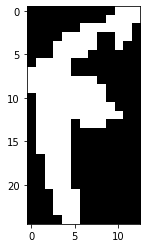

In [4]:
plt.imshow(X_train_orginal[300], cmap='gray')
plt.show()

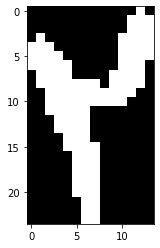

Label 80th image is: 2


In [5]:
i=80
image = X_train_orginal[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label {}th image is: {}".format(i, label))

<div style="direction:rtl;text-align:left;font-family:Tahoma">
In the code above, change the value of i and see the images</div>

## <div style="direction:rtl;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Resize data collection images</div>
<div style="direction:rtl;text-align:left;font-family:Tahoma">
Datasheet images vary in size. <br>
Resize all images to a certain size (5 * 5).
</div>

In [6]:
#resize
X_train_8by8 = [resize(img, (8, 8)) for img in X_train_orginal]
X_test_8by_8 = [resize(img, (8, 8)) for img in X_test_original]

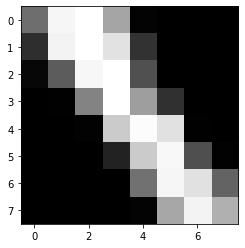

In [10]:
image = X_train_8by8[100]
plt.imshow(image, cmap='gray')
plt.show()

## <div style="direction:rtl;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Data set deformation</div>
<div style="direction:rtl;text-align:left;font-family:Tahoma">
Now the image data is in 5x5 scale. To use in our algorithms, we transform them into a vector of 25.
</div>


In [21]:
#reshape
X_train = [x.reshape(64) for x in X_train_8by8]
X_test = [x.reshape(64) for x in X_test_8by_8]

In [20]:
X_train[200].shape

(64,)